In [5]:
import numpy as np
import matplotlib.pyplot as plt

# noise_variance = 0.1
# X_train = np.arange(0, 2*np.pi, 0.1)
# sin_Y_train = np.sin(2 * X_train) + np.random.normal(0, np.sqrt(noise_variance), len(X_train))
# X_test = np.arange(0.05, 2 * np.pi, 0.1)
# sin_Y_test = np.sin(2 * X_test) + np.random.normal(0, np.sqrt(noise_variance), len(X_test))
noise_variance = 0.1
X_train = np.arange(0, 2*np.pi, 0.1)
sin_Y_train = np.where(np.sin(2 * X_train) >= 0, 1, -1) + np.random.normal(0, np.sqrt(noise_variance), len(X_train))
X_test = np.arange(0.05, 2 * np.pi, 0.1)
sin_Y_test = np.where(np.sin(2 * X_test) >= 0, 1, -1) + np.random.normal(0, np.sqrt(noise_variance), len(X_test))

class RBFNN:
    def __init__(self, node_number, sigma=1.0, eta=0.01):
        self.node_number = node_number
        self.sigma = sigma
        self.node_positions = None
        self.weights = None
        self.kernel_matrix = None
        self.eta = eta

    def get_node_positions(self, X):
        self.node_positions = np.linspace(0, 2*np.pi, self.node_number)

    def RBF_function(self, x, node_position):
        return np.exp(-np.linalg.norm(x - node_position)**2 / (2 * self.sigma**2))

    def get_kernel_matrix(self, X):
        self.get_node_positions(X)
        self.kernel_matrix = np.zeros((len(X), self.node_number))
        for i in range(len(X)):
            self.kernel_matrix[i, :] = np.array([self.RBF_function(X[i], node_position) for node_position in self.node_positions])
        return self.kernel_matrix

    def fit_batch(self, X, Y):
        self.get_kernel_matrix(X)
        self.weights, _, _, _ = np.linalg.lstsq(self.kernel_matrix, Y, rcond=None)

    def fit_online(self, X, Y, epochs=1000):
        self.get_kernel_matrix(X)
        self.weights = np.random.randn(self.node_number)

        for epoch in range(epochs):
            for i in range(len(X)):
                phi_x = self.kernel_matrix[i, :]
                y_pred = np.dot(phi_x, self.weights)
                error = Y[i] - y_pred
                self.weights += self.eta * error * phi_x

    def predict(self, X_test):
        kernel_test = self.get_kernel_matrix(X_test)
        return np.dot(kernel_test, self.weights)


Batch Learning Error abs: 0.32919
Online Learning Error abs: 0.36093
Batch Learning Error std: 0.43398
Online Learning Error std: 0.50627


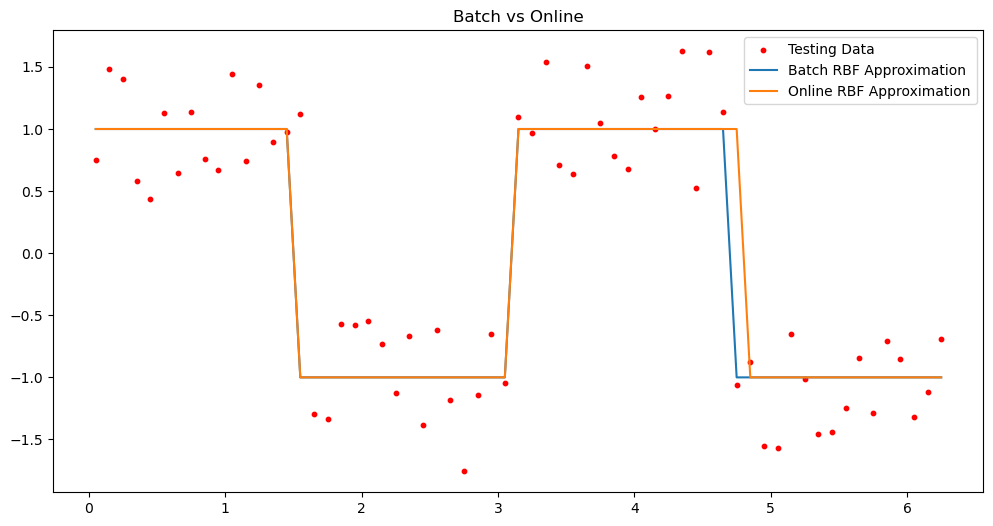

In [6]:
node_number = 10
sigma = 0.7
eta = 0.01  
epochs = 1000

sin_rbf_batch = RBFNN(node_number, sigma)
sin_rbf_online = RBFNN(node_number, sigma, eta)

sin_rbf_batch.fit_batch(X_train, sin_Y_train)
Y_pred_batch = sin_rbf_batch.predict(X_test)
Y_pred_batch = np.where(Y_pred_batch >= 0, 1, -1)#-----------------------------------------------change here
batch_error_abs = np.abs(Y_pred_batch - sin_Y_test).mean()
batch_error_std = np.std(Y_pred_batch - sin_Y_test)
sin_rbf_online.fit_online(X_train, sin_Y_train, epochs)
Y_pred_online = sin_rbf_online.predict(X_test)
Y_pred_online = np.where(Y_pred_online >= 0, 1, -1)#-----------------------------------------------change here 
online_error_abs = np.abs(Y_pred_online - sin_Y_test).mean()
online_error_std = np.std(Y_pred_online - sin_Y_test)

print(f"Batch Learning Error abs: {batch_error_abs:.5f}")
print(f"Online Learning Error abs: {online_error_abs:.5f}")
print(f"Batch Learning Error std: {batch_error_std:.5f}")
print(f"Online Learning Error std: {online_error_std:.5f}")


plt.figure(figsize=(12, 6))
plt.scatter(X_test, sin_Y_test, color='red', s=10, label="Testing Data")
plt.plot(X_test, Y_pred_batch, label="Batch RBF Approximation")
plt.plot(X_test, Y_pred_online, label="Online RBF Approximation",)
plt.title("Batch vs Online")
plt.legend()
plt.show()


Nodes: 5, Sigma: 0.3, Residual Error: 0.90328
Nodes: 5, Sigma: 0.5, Residual Error: 0.76714
Nodes: 5, Sigma: 0.7, Residual Error: 0.61938
Nodes: 5, Sigma: 1.0, Residual Error: 0.59866
Nodes: 5, Sigma: 1.5, Residual Error: 0.57517
Nodes: 5, Sigma: 6.0, Residual Error: 0.65112
Nodes: 10, Sigma: 0.3, Residual Error: 0.32919
Nodes: 10, Sigma: 0.5, Residual Error: 0.32919
Nodes: 10, Sigma: 0.7, Residual Error: 0.32919
Nodes: 10, Sigma: 1.0, Residual Error: 0.32919
Nodes: 10, Sigma: 1.5, Residual Error: 0.32919
Nodes: 10, Sigma: 6.0, Residual Error: 0.36093
Nodes: 15, Sigma: 0.3, Residual Error: 0.32919
Nodes: 15, Sigma: 0.5, Residual Error: 0.36093
Nodes: 15, Sigma: 0.7, Residual Error: 0.36093
Nodes: 15, Sigma: 1.0, Residual Error: 0.36093
Nodes: 15, Sigma: 1.5, Residual Error: 0.36093
Nodes: 15, Sigma: 6.0, Residual Error: 0.36093
Nodes: 20, Sigma: 0.3, Residual Error: 0.36093
Nodes: 20, Sigma: 0.5, Residual Error: 0.36093
Nodes: 20, Sigma: 0.7, Residual Error: 0.32919
Nodes: 20, Sigma: 1

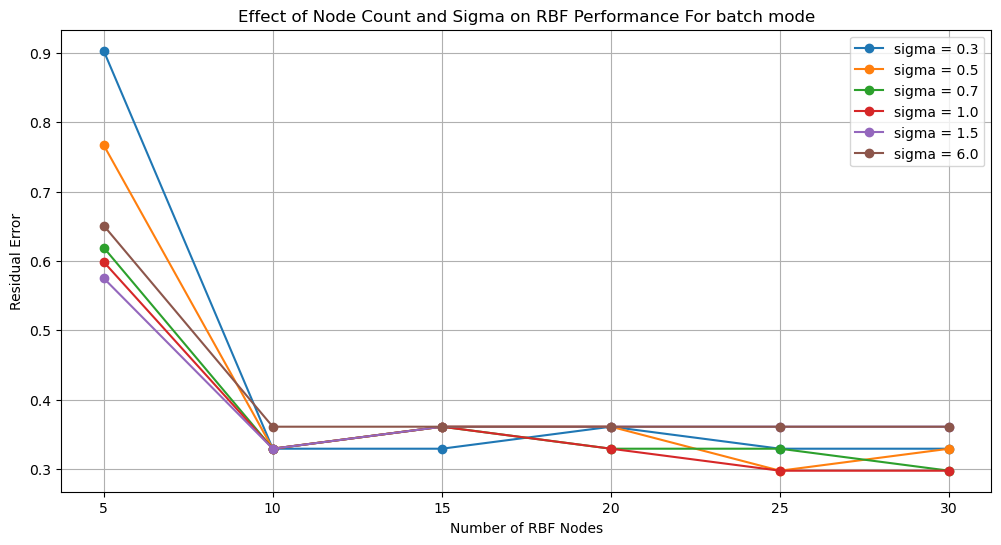

In [7]:
node_number_list = [5, 10, 15, 20,25,30]  
sigma_values_list = [0.3, 0.5, 0.7, 1.0, 1.5,6.0]  

results = []

for node_number in node_number_list:
    for sigma in sigma_values_list:
        sin_rbf = RBFNN(node_number, sigma)
        sin_rbf.fit_batch(X_train, sin_Y_train)
        Y_pred = sin_rbf.predict(X_test)
        Y_pred = np.where(Y_pred >= 0, 1, -1)#-----------------------------------------------change here 
        residual_error = np.abs(Y_pred - sin_Y_test).mean()
        results.append((node_number, sigma, residual_error))
        print(f"Nodes: {node_number}, Sigma: {sigma}, Residual Error: {residual_error:.5f}")


results = np.array(results, dtype=[('nodes', int), ('sigma', float), ('error', float)])
plt.figure(figsize=(12, 6))
for sigma in sigma_values_list:
    subset = results[results['sigma'] == sigma]
    plt.plot(node_number_list, subset['error'], marker='o', label=f"sigma = {sigma}")

plt.xlabel("Number of RBF Nodes")
plt.ylabel("Residual Error")
plt.title("Effect of Node Count and Sigma on RBF Performance For batch mode")
plt.legend()
plt.grid()
plt.show()


Nodes: 5, Sigma: 0.3, Residual Error: 0.90328
Nodes: 5, Sigma: 0.5, Residual Error: 0.79889
Nodes: 5, Sigma: 0.7, Residual Error: 0.65112
Nodes: 5, Sigma: 1.0, Residual Error: 0.56692
Nodes: 5, Sigma: 1.2, Residual Error: 0.56692
Nodes: 5, Sigma: 1.5, Residual Error: 0.56692
Nodes: 10, Sigma: 0.3, Residual Error: 0.32919
Nodes: 10, Sigma: 0.5, Residual Error: 0.32919
Nodes: 10, Sigma: 0.7, Residual Error: 0.36093
Nodes: 10, Sigma: 1.0, Residual Error: 0.36093
Nodes: 10, Sigma: 1.2, Residual Error: 0.44819
Nodes: 10, Sigma: 1.5, Residual Error: 0.51168
Nodes: 15, Sigma: 0.3, Residual Error: 0.32919
Nodes: 15, Sigma: 0.5, Residual Error: 0.32919
Nodes: 15, Sigma: 0.7, Residual Error: 0.32919
Nodes: 15, Sigma: 1.0, Residual Error: 0.36093
Nodes: 15, Sigma: 1.2, Residual Error: 0.41986
Nodes: 15, Sigma: 1.5, Residual Error: 0.51168
Nodes: 20, Sigma: 0.3, Residual Error: 0.32919
Nodes: 20, Sigma: 0.5, Residual Error: 0.32919
Nodes: 20, Sigma: 0.7, Residual Error: 0.36093
Nodes: 20, Sigma: 1

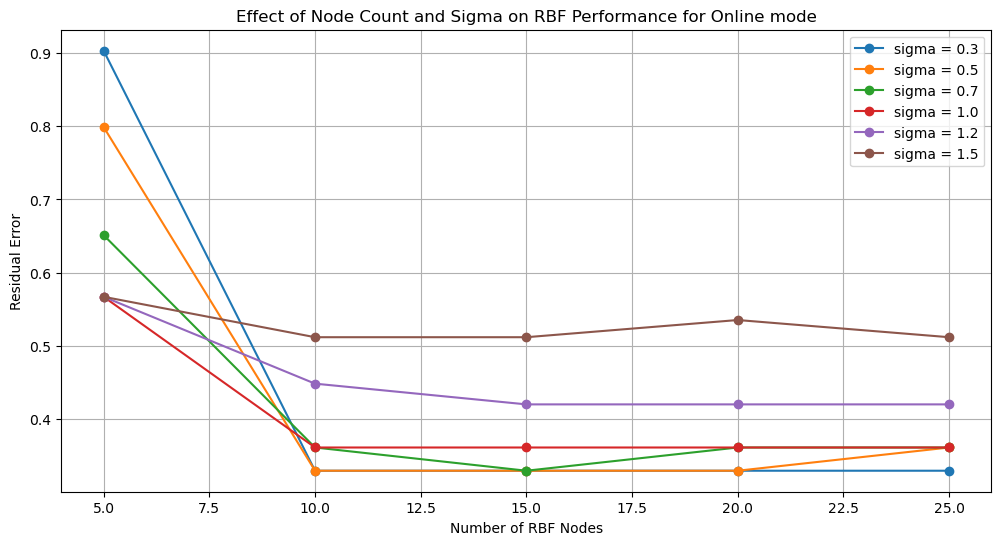

In [8]:
node_number_list = [5, 10, 15,20,25]  
sigma_values_list = [0.3, 0.5, 0.7, 1.0, 1.2,1.5]  

results = []

for node_number in node_number_list:
    for sigma in sigma_values_list:
        sin_rbf = RBFNN(node_number, sigma)
        sin_rbf.fit_online(X_train, sin_Y_train)
        Y_pred = sin_rbf.predict(X_test)
        Y_pred = np.where(Y_pred >= 0, 1, -1)#-----------------------------------------------change here 
        residual_error = np.abs(Y_pred - sin_Y_test).mean()
        results.append((node_number, sigma, residual_error))
        print(f"Nodes: {node_number}, Sigma: {sigma}, Residual Error: {residual_error:.5f}")


results = np.array(results, dtype=[('nodes', int), ('sigma', float), ('error', float)])
plt.figure(figsize=(12, 6))
for sigma in sigma_values_list:
    subset = results[results['sigma'] == sigma]
    plt.plot(node_number_list, subset['error'], marker='o', label=f"sigma = {sigma}")

plt.xlabel("Number of RBF Nodes")
plt.ylabel("Residual Error")
plt.title("Effect of Node Count and Sigma on RBF Performance for Online mode")
plt.legend()
plt.grid()
plt.show()
